<a href="https://colab.research.google.com/github/doryeng/web1/blob/master/FBProphet_NC_Soft_can_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 엔씨소프트 주가 예측
https://can-do.tistory.com/113

In [1]:
from pandas_datareader import data
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# 야후 fianace이용 :https://finance.yahoo.com/

In [2]:
import fix_yahoo_finance as yf
yf.pdr_override()

In [3]:
start_date = '2008-01-01'
name = '036570.KS'
nc = data.get_data_yahoo(name, start_date)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
nc.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,49000.0,50100.0,48600.0,48700.0,43573.867188,83601
2008-01-03,48650.0,49500.0,48500.0,49150.0,43976.496094,49680
2008-01-04,48700.0,49200.0,48000.0,48750.0,43618.597656,88832


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

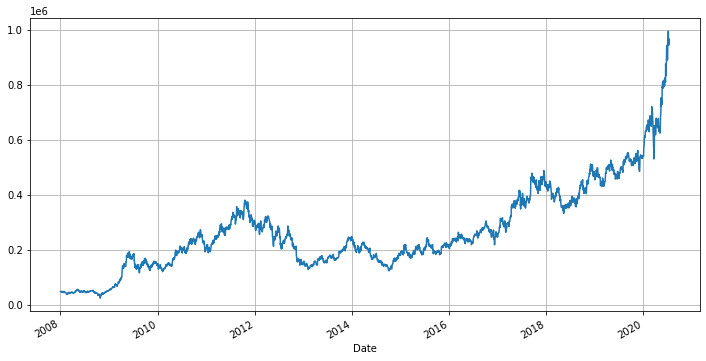

In [6]:
nc['Close'].plot(figsize=(12, 6), grid=True)

In [7]:
nc_trunc = nc[:'2016-12-31']
nc_trunc.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,49000.0,50100.0,48600.0,48700.0,43573.867188,83601
2008-01-03,48650.0,49500.0,48500.0,49150.0,43976.496094,49680
2008-01-04,48700.0,49200.0,48000.0,48750.0,43618.597656,88832


In [8]:
df = pd.DataFrame({'ds':nc_trunc.index, 'y':nc_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head(3)

,ds,y
0,2008-01-02,48700.0
1,2008-01-03,49150.0
2,2008-01-04,48750.0


In [9]:
from fbprophet import Prophet

In [10]:
m = Prophet()
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=365*2)
future.tail(3)

,ds
2962,2018-12-27
2963,2018-12-28
2964,2018-12-29


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
2962,2018-12-27,357214.223126,128075.022768,583330.103542
2963,2018-12-28,357041.682059,125409.605759,577053.994249
2964,2018-12-29,355172.504904,122221.717310,580172.830425


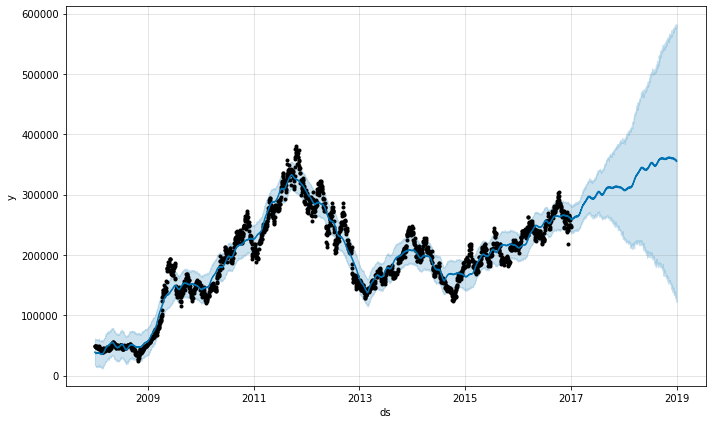

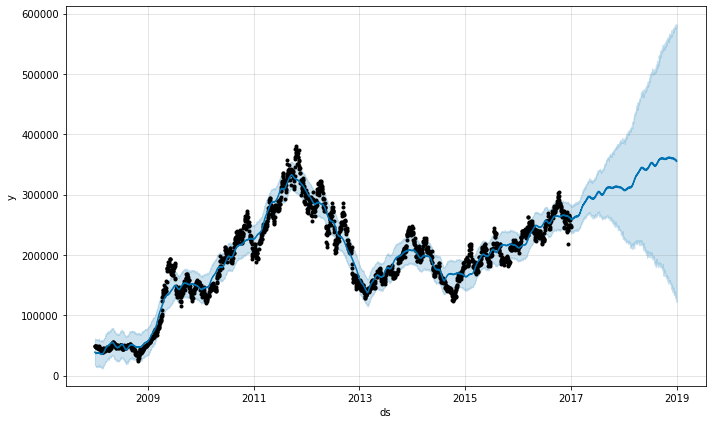

In [13]:
m.plot(forecast)

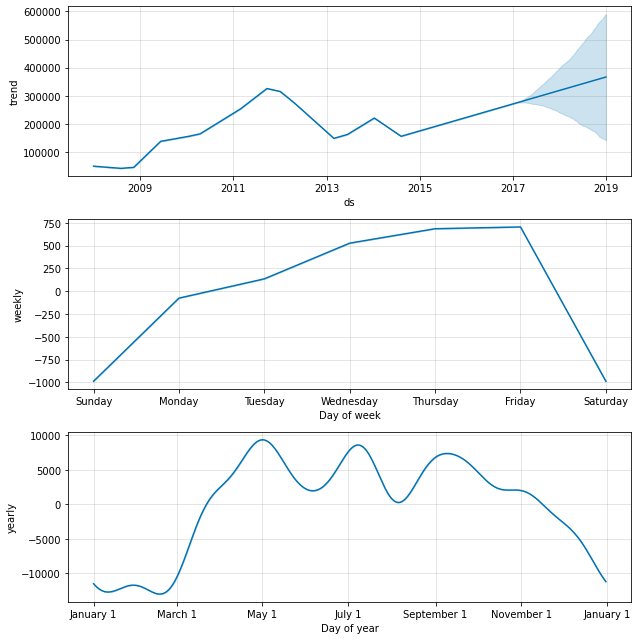

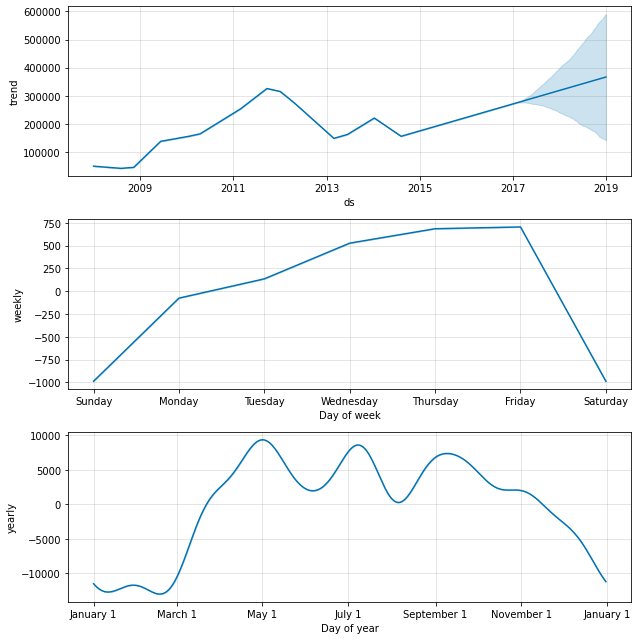

In [14]:
m.plot_components(forecast)

### 이제 2017년도 기록을 가지고 실제데이터와 예측데이터를 비교해보자

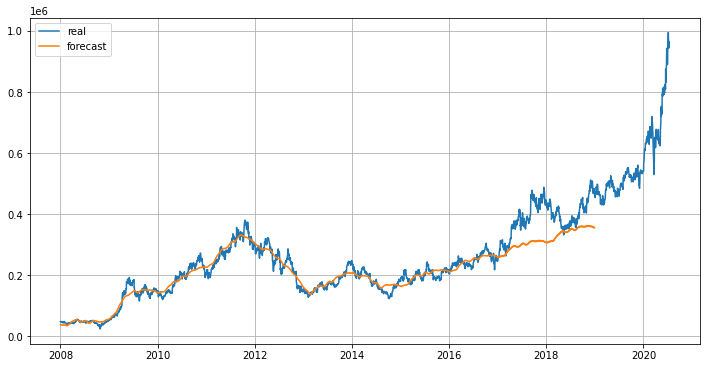

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(nc.index, nc['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()